# 📊Research: <br> Determination of the prospective tariff for the Megaline telecom company
***

### Project Description
Megaline Company is a federal mobile operator. Customers are offered two tariff plans: Smart and Ultra. In order to adjust the advertising budget, the commercial department wants to understand which tariff brings more money.

It is necessary to make a preliminary analysis of tariffs on a small sample of customers. At your disposal are the data of 500 Megaline users: who they are, where they come from, what tariff they use, how many calls and messages each one sent in 2018. It is necessary to analyze customer behavior and conclude which tariff is better.

### Description of the sequence of actions <a class="anchor" id="contents"></a>
- [Step 1. Learning General Information](#first-bullet)<br>
<br>
- [Step 2. Data preprocessing](#second-bullet)<br>
    - [2.1. Data Type Changes](#second2-1-bullet)<br>
    - [2.2. Search and Correction of Data Errors](#second2-2-bullet)<br>
    - [2.3. Counting for each user:](#second2-3-bullet)<br>
        - [2.3.1. The number of calls made and minutes spent talking per month;](#second2-3-1-bullet)<br>
        - [2.3.2. The number of messages sent by month;](#second2-3-2-bullet)<br>
        - [2.3.3. Monthly Internet traffic spent;](#second2-3-3-bullet)<br>
        - [2.3.4. Monthly revenue from each user](#second2-3-4-bullet)<br>
<br>
- [Step 3. Data Analysis](#third-bullet)<br>
    - [3.1. Description of operator customer behavior based on the sample](#second3-1-bullet)<br>
    - [3.2. Calculation of average quantity, variance and standard deviation](#second3-2-bullet)<br>
    - [3.3. Distribution histograms](#second3-3-bullet)<br>
    - [3.4. Description of the resulting distributions](#second3-4-bullet)<br>
<br>
- [Step 4. Hypothesis Testing](#fourth-bullet)<br>
    - [4.1. Hypothesis 1. The average revenue of users of the tariffs "Ultra" and "Smart" is different](#fourth4-1-bullet)<br>
    - [4.2. Hypothesis 2. The average revenue of users from Moscow differs from the revenue of users from other regions](#fourth4-2-bullet)<br>
<br>
- [Step 5. General conclusion](#fifth-bullet)<br>

### Data Description
Five tables are provided for analysis. The data are described in more detail in the ToR of the design assignment.

| Table `users` <br> (user information) | Calls table <br> (information about calls) | Table `messages` <br> (information about messages) | Table `internet` <br> (information about Internet sessions) | Table `tariffs` <br> (tariff information) |
|-----------------------------------------------	|-----------------------------------------	|-----------------------------------------------	|------------------------------------------------------	|-------------------------------------------	|
| `user_id`                                     	| `id`                                    	| `id`                                          	| `id`                                                 	| `tariff_name`                             	|
| `first_name`                                  	| `call_date`                             	| `message_date`                                	| `mb_used`                                            	| `rub_monthly_fee`                         	|
| `last_name`                                   	| `duration`                              	| `user_id`                                     	| `session_date`                                       	| `minutes_included`                        	|
| `age`                                         	| `user_id`                               	|                                               	| `user_id`                                            	| `messages_included`                       	|
| `reg_date`                                    	|                                         	|                                               	|                                                      	| `mb_per_month_included`                   	|
| `churn_date`                                  	|                                         	|                                               	|                                                      	| `rub_per_minute`                          	|
| `city`                                        	|                                         	|                                               	|                                                      	| `rub_per_message`                         	|
| `tariff`                                      	|                                         	|                                               	|                                                      	| `rub_per_gb`                              	|


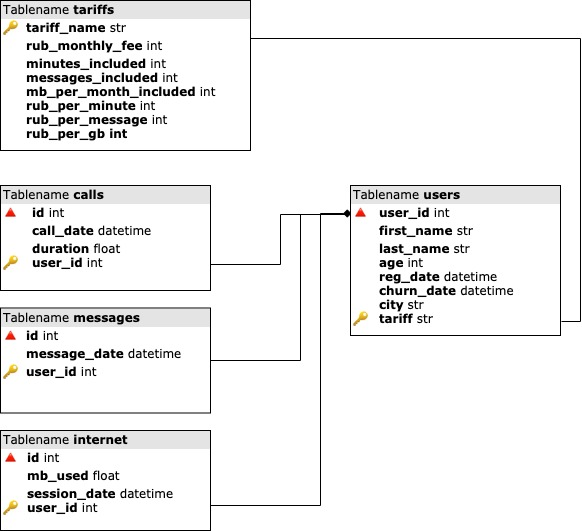

From the tables provided for analysis, several conclusions can already be drawn:
- In tables **calls**, **messrges** and **interner** you definitely need to rename the column `id`. Since when joining tables, we get lost in three absolutely identical named columns.
     - In the table **calls** `id` =>` id_calls`
     - In the table **messages** `id` =>` id_messages`
     - In the table **internet** `id` =>` id_internet`
- In the tables **tariff** and **users** there is a tariff name, you need to rename the column `tariff_name` in the table **tariff**. So we will have equally named columns in other tables.
     - In the table ** tariff ** `tariff_name` =>` tariff`

# Step 1. Learning General Information <a class="anchor" id="first-bullet"></a>
[back to table of contents](#contents)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [53]:
data_users = pd.read_csv("./users.csv")
data_calls = pd.read_csv("./tariffs.csv")
data_messages = pd.read_csv("./calls.csv")
data_internet = pd.read_csv("./internet.csv")
data_tariffs = pd.read_csv("./messages.csv")

**1. Table users**

In [54]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [55]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [56]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [57]:
data_users.duplicated().sum()

0

In [58]:
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

The table **users** 8 columns, 500 rows. <br>
In two columns of the table, you need to change the data type:
- `churn_date` object => datetime
- `reg_date` object => datetime <br>

All presented table columns have missing values, they must be processed. <br>
Out of 500 users, 351 users use the tariff **smart**, 149 users use the tariff **ultra**.

**2. Table calls**

In [59]:
data_calls.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [60]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


The operator "Megaline" rounds up the values of the minutes spent. <br>
If the user speaks only 1 second, the minute counts in the tariff. <br>
Check how many calls were less than a minute

In [62]:
data_calls.sort_values(['tariff_name', 'messages_included']).head(10)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [63]:
data_calls.isna().sum()

messages_included        0
mg_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [64]:
data_calls.duplicated().sum()

0

The table **calls** 4 columns, 202,607 rows. <br>
In two columns of the table, you need to change the data type:
- `call_date` object => datetime <br>

All presented table columns have missing values, they must be processed. <br>
47 927 calls have a duration of less than 1 minute. In order not to lose about 20% of the data we need:
- Apply the `np.ceil` method to indicate the duration of the phone call. Functions `np.ceil` will return us the upper nearest (rounded) value in minutes;
- We will replace the zero call duration by 1 minute, since the minute is the minimum value of the call session for the operator, I do not think that this will cause a big slant in the data.

**3. Table messages**

In [45]:
data_messages.head()

,Unnamed: 0,id,call_date,duration,user_id
0,0,1000_0,2018-07-25,0.00,1000
1,1,1000_1,2018-08-17,0.00,1000
2,2,1000_2,2018-06-11,2.85,1000
3,3,1000_3,2018-09-21,13.80,1000
4,4,1000_4,2018-12-15,5.18,1000


In [65]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [66]:
data_messages.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [67]:
data_messages.duplicated().sum()

0

The table **messages** 3 columns, 123036 rows. <br>
In two columns of the table, you need to change the data type:
- `message_date` object => datetime <br>

All presented columns of the table have missing values, they must be processed.

**4. Table internet**

In [68]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [69]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [70]:
len(data_internet.query('mb_used < 1'))

19699

In [71]:
data_internet.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [72]:
data_internet.duplicated().sum()

0

In the table **internet** 4 columns, 149,396 rows. <br>
In two columns of the table, you need to change the data type:
- `session_date` object => datetime <br>

All presented table columns have missing values, they must be processed. <br>

In the column `mb_used` - the amount of Internet traffic spent per session in megabytes, but in the tariff description in the table **tariffs** column` mg_per_month_included` data in gigabytes. To understand at what point the user will use up the amount of Internet traffic according to their tariff, we need to present data on the volume of spent traffic in gigabyte format, so we can calculate how much the user spent. <br>

19 699 Internet sessions have less than 1 mb of Internet traffic spent per session. As in the case of calls, the operator rounds up the values of megabytes. Therefore, it is necessary:
- Apply the `np.ceil` method to indicate the duration of Internet sessions. Functions `np.ceil` will return us the upper nearest (rounded) value in mb;
- We will replace the zero duration of Internet sessions by 1 minute, since a minute is the minimum value of an Internet session for an operator, I don’t think that this will cause a big slant in the data.

**5. Table tariffs**

In [73]:
data_tariffs.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [74]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [75]:
data_tariffs.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [76]:
data_tariffs.duplicated().sum()

0

In the table **tariffs** 8 columns, 2 rows. This is due to the fact that we are considering only two tariff plans: Smart and Ultra.
In the two columns of the table, there is no need to change data types. Only the column name needs to be changed:
- `tariff_name` =>` tariff`

All presented table columns have missing values, they must be processed. <br>

# Step 2. Data preprocessing <a class="anchor" id="second-bullet"></a>
[back to table of contents](#contents)

## 2.1. Data Type Changes <a class="anchor" id="second2-1-bullet"></a>

**Change the data type** <br>
Let's bring the data to the necessary types. When studying the information from the tables, we found that we need to change the type of data in the following tables and columns:
- table **data_users**
     - `churn_date` object => datetime
     - `reg_date` object => datetime
- table **data_calls**
     - `call_date` object => datetime
- table **data_messages**
     - `message_date` object => datetime
- table **data_internet**
     - `session_date` object => datetime

In [ ]:
dateformat = '%Y-%m-%d'

def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=dateformat)

to_datetime(data_users, ['churn_date'])
to_datetime(data_users, ['reg_date'])
to_datetime(data_calls, ['call_date'])
to_datetime(data_messages, ['message_date'])
to_datetime(data_internet, ['session_date'])

## 2.2. Search and Correction of Data Errors <a class="anchor" id="second2-2-bullet"></a>

**Restore the omissions** <br>
In the tables **data_calls** and **data_internet** there is data that we need to process, we need:
- In table **data_calls**
    - apply the `np.ceil` method for the sign of the duration of the phone call` duration`. Functions `np.ceil` will return us the upper nearest (rounded) value in minutes;
    - replace the zero call duration by 1 minute, since the minute is the minimum value of the call session for the operator, I do not think that this will cause a big slant in the data.
- In the table **data_internet**
    - apply the method `np.ceil` for the sign of the duration of the Internet sessions` mb_used`. Functions `np.ceil` will return us the upper nearest (rounded) value in mb;
    - replace the zero duration of Internet sessions by 1 minute, since a minute is the minimum value of an Internet session for an operator, I don’t think that this will cause a big slant in the data.

In [29]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
nonzero_session = data_calls['duration'] > 0
data_calls['duration'].where(nonzero_session, 1, inplace=True)

In [30]:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil)
nonzero_session = data_internet['mb_used'] > 0
data_internet['mb_used'].where(nonzero_session, 1, inplace=True)

**Rename the column `tariff_name` in the tariffs table**

In [31]:
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})

In [32]:
data_tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In the table **tariffs** I saw one interesting thing:
- The column `mg_per_month_included` gives data on tariff plans. Restriction on traffic tariff **smart** - 15GB, tariff **ultra** - 30GB. The table data is presented in megabytes. Since in 1GB = 1024MB.

In [33]:
smart = 15 * 1024
ultra = 30 * 1024

print("Ограничение по трафику тарифа smart:", smart)
print("Ограничение по трафику тарифа ultra:", ultra)

Ограничение по трафику тарифа smart: 15360
Ограничение по трафику тарифа ultra: 30720


Since the data in megabytes is in the table, rename the column.

In [34]:
data_tariffs = data_tariffs.rename(columns={'mg_per_month_included':'mb_per_month_included'})

**Rename the column `id` in the table calls**

In [35]:
data_calls = data_calls.rename(columns={'id': 'id_calls'})

In [36]:
data_calls.head()

,id_calls,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


**Rename the column `id` in the messages table**

In [37]:
data_messages = data_messages.rename(columns={'id': 'id_messages'})

In [38]:
data_messages.head()

,id_messages,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Rename the column `id` in the internet table**

In [39]:
data_internet = data_internet.rename(columns={'id': 'id_internet'})

In [40]:
data_internet.head()

,id_internet,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


## 2.3. Counting for each user <a class="anchor" id="second2-3-bullet"></a>

### 2.3.1. The number of calls made and minutes spent talking per month <a class="anchor" id="second2-3-1-bullet"></a>
The simplest solution to this problem, I think, is to add a new column and create a pivot table. So, I will add a new column with the names of the months, which is determined based on the column `call_date`. Then we will create a pivot table on the column `month`, also counting and summing the values of the column` duration`.

In [41]:
data_calls['month'] = data_calls['call_date'].dt.month_name()

In [42]:
data_calls.head()

,id_calls,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,July
1,1000_1,2018-08-17,1.0,1000,August
2,1000_2,2018-06-11,3.0,1000,June
3,1000_3,2018-09-21,14.0,1000,September
4,1000_4,2018-12-15,6.0,1000,December


In [43]:
calls_by_month = data_calls.pivot_table(
    index=['month'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [44]:
calls_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
calls_by_month['n_month'] = calls_by_month['n_month'].astype('int').apply(abs)

In [45]:
calls_by_month.sort_values(by=['n_month'])

,count,sum,n_month
,duration,duration,
month,,,
January,1476,11096.0,1
February,3328,25078.0,2
March,6687,49455.0,3
April,9272,68078.0,4
May,12647,91341.0,5
June,14716,108063.0,6
July,18298,135264.0,7
August,21488,157929.0,8


`count duration` is the number of calls per month; <br>
`sum duration` is the duration of calls in minutes per month. <br>

### 2.3.2. The number of messages sent by month <a class="anchor" id="second2-3-2-bullet"></a>
Here, I also think that a simple solution is to add a new column and group by column.

In [46]:
data_messages['month'] = data_messages['message_date'].dt.month_name()

In [47]:
data_messages.sort_values('message_date').head()

,id_messages,message_date,user_id,month
35693,1155_82,2018-01-02,1155,January
112561,1453_586,2018-01-02,1453,January
112248,1453_273,2018-01-02,1453,January
36021,1155_410,2018-01-02,1155,January
13096,1055_62,2018-01-02,1055,January


In [48]:
messages_by_month = data_messages.pivot_table(
    index=['month'],
    values='message_date',
    aggfunc=['count']
)

In [49]:
messages_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
messages_by_month['n_month'] = messages_by_month['n_month'].astype('int').apply(abs)

In [50]:
messages_by_month.sort_values(by=['n_month'])

,count,n_month
,message_date,
month,,
January,924,1
February,1924,2
March,3648,3
April,5179,4
May,7298,5
June,8983,6
July,11320,7
August,13088,8


`count message_date` is the number of messages sent per month.

### 2.3.3. Monthly Internet traffic spent <a class="anchor" id="second2-3-3-bullet"></a>

In [51]:
data_internet['month'] = data_internet['session_date'].dt.month_name()

In [52]:
data_internet.head()

,id_internet,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,November
1,1000_1,1053.0,2018-09-07,1000,September
2,1000_2,1198.0,2018-06-25,1000,June
3,1000_3,551.0,2018-08-22,1000,August
4,1000_4,303.0,2018-09-24,1000,September


In [53]:
internet_by_month = data_internet.pivot_table(
    index=['month'],
    values='mb_used',
    aggfunc=['count', 'sum']
)

In [54]:
internet_by_month['n_month'] = ['4', '8', '12', '2', '1', '7', '6', '3', '5', '11', '10', '9']
internet_by_month['n_month'] = internet_by_month['n_month'].astype('int').apply(abs)

In [55]:
internet_by_month.sort_values(by=['n_month'])

,count,sum,n_month
,mb_used,mb_used,
month,,,
January,1117,408364.0,1
February,2641,956726.0,2
March,4885,1814583.0,3
April,6511,2436930.0,4
May,9408,3531092.0,5
June,11057,4186171.0,6
July,13548,5037059.0,7
August,16092,6007209.0,8


`count mb_used` is the number of Internet sessions per month; <br>
`sum mb_used` is the amount of monthly Internet traffic consumed.

**Joint Table** <br>
For visual display, combined three tables **calls_by_month**, **messages_by_month**, **internet_by_month**

In [56]:
data_per_month = calls_by_month.merge(messages_by_month, on=['n_month','month'], how='outer')\
    .merge(internet_by_month, on=['n_month','month'], how='outer')

In [57]:
data_per_month.columns = ['calls', 'calls_duration', 'n_month', 'messages', 'internet_session', 'mb']
data_per_month.sort_values(by=['n_month'])

,calls,calls_duration,n_month,messages,internet_session,mb
month,,,,,,
January,1476,11096.0,1,924,1117,408364.0
February,3328,25078.0,2,1924,2641,956726.0
March,6687,49455.0,3,3648,4885,1814583.0
April,9272,68078.0,4,5179,6511,2436930.0
May,12647,91341.0,5,7298,9408,3531092.0
June,14716,108063.0,6,8983,11057,4186171.0
July,18298,135264.0,7,11320,13548,5037059.0
August,21488,157929.0,8,13088,16092,6007209.0
September,24061,178090.0,9,14759,17512,6457245.0


### 2.3.4. Monthly revenue from each user <a class="anchor" id="second2-3-4-bullet"> </a>
<font color = green> Hint from the task: </font> monthly revenue from each user = subtract the free limit from the total number of calls, messages and Internet traffic; multiply the remainder by the value from the tariff plan; add the subscription fee corresponding to the tariff plan. <br>

Since earlier, for identification, I was already looking through summary tables:
- by the number of calls made and minutes spent talking per month;
- by the number of messages sent by month;
- by the volume of consumed Internet traffic by months.

In order to calculate the revenue received by the operator from each user, I need to collect all the data from 5 tables. To start, I will group data on calls, messages and spent Internet traffic. After that, you can apply the merge () method and put everything together.

In [58]:
user_calls = data_calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id_calls':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'minutes','id_calls':'calls'})

In [59]:
user_messages = data_messages.groupby(['user_id', 'month'])\
                        .agg({'id_messages':'count'})\
                        .reset_index()\
                        .rename(columns={'id_messages':'sms'})

In [60]:
user_internet = data_internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()

In [61]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')\
    .merge(user_internet, on=['user_id','month'], how = 'outer')\
    .merge(data_users, on='user_id', how='left')\
    .merge(data_tariffs, on='tariff', how='left')

In [62]:
df.head()

,user_id,month,minutes,calls,sms,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null object
minutes                  3174 non-null float64
calls                    3174 non-null float64
sms                      2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_

In the resulting table, we need to check for gaps and duplicates.

In [64]:
df.duplicated().sum()

0

In [65]:
df.isna().sum()

user_id                     0
month                       0
minutes                    40
calls                      40
sms                       497
mb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

The new table contains gaps in 4 columns. The number of gaps is small, for this reason I think that I can replace all gaps with zero values.

In [66]:
df['minutes'] = df['minutes'].fillna(0)
df['calls'] = df['calls'].fillna(0)
df['sms'] = df['sms'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)

<font color = green> Hint from the quest:
- monthly revenue from each user = subtract the free limit from the total number of calls, messages and Internet traffic; <br>
- multiply the remainder by the value from the tariff plan; <br>
- add the subscription fee corresponding to the tariff plan. </font>

In order to calculate the monthly revenue from each user, I need to find out the difference between the number of services provided in the tariff and the users use. To do this, I add three columns to the table. In these columns I find out how users use the provided service package. That is, from the restrictions provided in the tariff, I subtract the spent number of minutes, sms and megabytes.

In [67]:
df['minutes_over']  = df['minutes'] - df['minutes_included']
df['messages_over'] = df['sms'] - df['messages_included']
df['mb_used_over']  = df['mb_used'] - df['mb_per_month_included']

In [68]:
df.head()

,user_id,month,minutes,calls,sms,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1000,August,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2582.0,-919.0,-16648.0
1,1000,December,341.0,46.0,70.0,9829.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2659.0,-930.0,-20891.0
2,1000,July,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2654.0,-925.0,-16703.0
3,1000,June,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2813.0,-940.0,-7458.0
4,1000,May,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-2836.0,-978.0,-28463.0


In the columns `minutes_over`,` messages_over`, `mb_used_over` in the table data on deviations from tariff restrictions. Negative values in the columns indicate that the user has a balance within the tariff. Positive values indicate cost overruns.

In [69]:
df.columns

Index(['user_id', 'month', 'minutes', 'calls', 'sms', 'mb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'minutes_over', 'messages_over', 'mb_used_over'],
      dtype='object')

Now you need to:
- the remainder of the tariff plan (`minutes_over`) multiplied by the value from the tariff plan (` rub_per_minute`);
- and then add the monthly fee corresponding to the tariff plan.

Since in the tariff plans the cost of an additional gigabyte of Internet traffic in excess of the tariff package is indicated in gigabytes. It is necessary to divide the number of remaining megabytes by 1024, since 1 gigabyte = 1024 megabytes.

In [70]:
def month_revenue(row):
    
    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']

    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']

    if row['mb_used_over'] > 0:
        mb_used_price = (row['mb_used_over'] / 1024) * row['rub_per_gb']
    
    return minutes_price + messages_price + mb_used_price

We add to our table two columns in which there will be an overpayment per month and a total amount per month.

In [71]:
df['rub_monthly_fee_over'] = df.apply(month_revenue, axis=1)
df['rub_monthly_fee_total'] = df['rub_monthly_fee'] + df['rub_monthly_fee_over']

For the convenience of viewing the table, we remove the extra columns and leave only the ones we need for analysis.

In [72]:
df = pd.DataFrame(
    df[['month', 'tariff', 'user_id', 'city',
        'calls', 'minutes', 'sms', 'mb_used',
        'minutes_over', 'messages_over', 'mb_used_over',
        'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

In [73]:
df.tail()

,month,tariff,user_id,city,calls,minutes,sms,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
3209,December,smart,1489,Санкт-Петербург,0.0,0.0,35.0,17349.0,-500.0,-15.0,1989.0,388.476562,938.476562
3210,November,smart,1489,Санкт-Петербург,0.0,0.0,20.0,17526.0,-500.0,-30.0,2166.0,423.046875,973.046875
3211,October,smart,1489,Санкт-Петербург,0.0,0.0,21.0,19599.0,-500.0,-29.0,4239.0,827.929688,1377.929688
3212,September,smart,1489,Санкт-Петербург,0.0,0.0,32.0,17246.0,-500.0,-18.0,1886.0,368.359375,918.359375
3213,April,ultra,1476,Москва,0.0,0.0,0.0,531.0,-3000.0,-1000.0,-30189.0,0.000000,1950.000000


Based on the resulting table, we can see the amount of data analyzed. <br>
We are interested in users of `ultra` and` smart` tariffs.

In [75]:
tariff_smart = df.query("tariff == 'smart'")

In [76]:
len(tariff_smart.groupby('user_id'))

350

In [77]:
tariff_ultra = df.query("tariff == 'ultra'")

In [78]:
len(tariff_ultra.groupby('user_id'))

148

In the resulting table after our conversions, we see that there are users who exceeded the tariff limits for the consumption of traffic, calls and sms. But there are also those who did not use the services provided by the tariff in full.

In the general table, the users of the Smart tariff are 350, the users of the Ultra tariff are 148. I have lost information about the expenses of two users, I still do not understand how it happened.

# Step 3. Data Analysis <a class="anchor" id="third-bullet"></a>
[back to table of contents](#contents)

## 3.1. Description of operator customer behavior based on the sample <a class="anchor" id="second3-1-bullet"></a>
**Summary table on tariffs by months**

In [84]:
values = ['minutes', 'sms', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

In [86]:
tariff_monthly_costs = df.pivot_table(
    index=['tariff', 'month'],
    values=values
)

In [87]:
smart_monthly_costs = tariff_monthly_costs.loc['smart']
smart_monthly_costs

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
month,,,,,
April,13486.080357,377.000000,384.781878,934.781878,30.741071
August,16640.212766,433.191489,726.647008,1276.647008,33.638298
December,18145.824926,491.418398,979.434927,1529.434927,35.994065
February,11617.344828,306.310345,262.159752,812.159752,24.086207
January,8528.588235,209.647059,154.895910,704.895910,18.235294
July,15771.398010,419.288557,635.629392,1185.629392,33.751244
June,15822.445122,406.701220,614.601038,1164.601038,33.402439
March,15131.207792,400.532468,583.213271,1133.213271,31.857143
May,15832.751773,398.404255,611.004377,1161.004377,33.773050


In [88]:
ultra_monthly_costs = tariff_monthly_costs.loc['ultra']
ultra_monthly_costs

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
month,,,,,
April,16845.254545,470.072727,45.474077,1995.474077,31.563636
August,19595.878505,524.570093,121.230195,2071.230195,48.439252
December,21815.683453,609.129496,176.322926,2126.322926,60.611511
February,11788.333333,304.666667,23.095703,1973.095703,21.958333
January,13154.666667,440.888889,0.000000,1950.000000,33.777778
July,20516.571429,560.296703,158.562092,2108.562092,49.846154
June,18943.928571,492.428571,82.109724,2032.109724,41.726190
March,17553.513514,503.081081,54.254645,2004.254645,32.297297
May,19383.194030,524.865672,105.022738,2055.022738,37.850746


**Tariff Summary Table**

In [92]:
tariff_usage = tariff_monthly_costs.pivot_table(
    index='tariff',
    values=values
)

tariff_usage

,mb_used,minutes,rub_monthly_fee_over,rub_monthly_fee_total,sms
tariff,,,,,
smart,15085.107080,397.374228,595.673948,1145.673948,31.413211
ultra,18224.477581,509.356551,88.972927,2038.972927,43.714983


**Conclusion**
- Ultra tariff users are more active, but Smart tariff users spend an average of 6 times more on additional service packages. An operator can use this for a marketing company. <br>
- The Ultra tariff brings more money to the operator, even taking into account the fact that on average users do not go beyond the limits of tariff limits, and Smart tariff users do not spend so much money to overtake the cost of the Ultra tariff. Thus, the Smart tariff is more beneficial for the user.

## 3.2. Calculation of average quantity, variance and standard deviation <a class="anchor" id="second3-2-bullet"></a>

**1. Analysis of call data and minutes of conversation** <br>
We find the average, variance and standard deviation in the use of calls by users, at two tariffs smart and ultra.

In [93]:
smart_monthly_costs['minutes'].describe()

count     12.000000
mean     397.374228
std       74.270865
min      209.647059
25%      393.053191
50%      412.994888
75%      438.742131
max      491.418398
Name: minutes, dtype: float64

In [94]:
ultra_monthly_costs['minutes'].describe()

count     12.000000
mean     509.356551
std       79.557936
min      304.666667
25%      486.839610
50%      524.717883
75%      556.928653
max      609.129496
Name: minutes, dtype: float64

In [163]:
df.groupby('tariff').agg({'minutes':['median','mean','var','std']}).style.format("{:.2f}")

**2. Message Data Analysis** <br>
We find the average, variance and standard deviation in the use of sms by users, at two tariffs smart and ultra.

In [121]:
smart_monthly_costs['sms'].describe()

count    12.000000
mean     31.413211
std       5.103413
min      18.235294
25%      31.578125
50%      33.638380
75%      33.767242
max      35.994065
Name: sms, dtype: float64

In [122]:
ultra_monthly_costs['sms'].describe()

count    12.000000
mean     43.714983
std      12.320470
min      21.958333
25%      33.407658
50%      45.082721
75%      53.162979
max      60.611511
Name: sms, dtype: float64

In [141]:
df.groupby('tariff').agg({'sms':['median','mean','var','std']}).style.format("{:.2f}")

**3. Web traffic analysis** <br>
We find the average, variance and standard deviation in the use of Internet traffic by users, at two tariffs smart and ultra.

In [126]:
smart_monthly_costs['mb_used'].describe()

count       12.000000
mean     15085.107080
std       2676.043117
min       8528.588235
25%      14719.925933
50%      15827.598448
75%      16676.873010
max      18145.824926
Name: mb_used, dtype: float64

In [127]:
ultra_monthly_costs['mb_used'].describe()

count       12.000000
mean     18224.477581
std       2988.831047
min      11788.333333
25%      17376.448771
50%      19303.618754
75%      19871.729296
max      21815.683453
Name: mb_used, dtype: float64

In [142]:
df.groupby('tariff').agg({'mb_used':['median','mean','var','std']}).style.format("{:.2f}")

## 3.3. Distribution histograms <a class="anchor" id="second3-3-bullet"></a>

**1. Analysis of call data and minutes of conversation** <br>
Normal distribution is determined by the mean and variance. They allow you to understand how noisy the data is now.

Text(0.5, 1.0, 'Звонки в минутах в месяц')

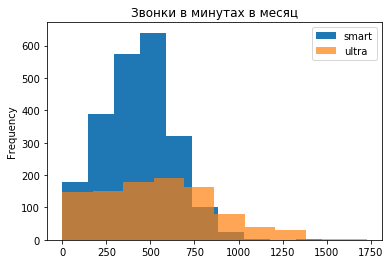

In [155]:
df[df['tariff'] == 'smart']['minutes'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['minutes'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Звонки в минутах в месяц')

**2. Message Data Analysis** <br>
Normal distribution is determined by the mean and variance. They allow you to understand how noisy the data is now.

Text(0.5, 1.0, 'Количество sms в месяц')

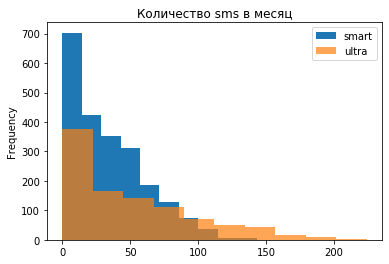

In [156]:
df[df['tariff'] == 'smart']['sms'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['sms'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Количество sms в месяц')

**3. Web traffic analysis** <br>
Normal distribution is determined by the mean and variance. They allow you to understand how noisy the data is now.

Text(0.5, 1.0, 'Расход интернет-трафика в месяц')

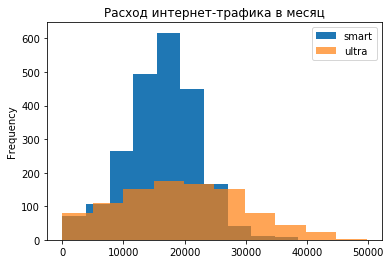

In [158]:
df[df['tariff'] == 'smart']['mb_used'].plot(kind='hist', label='smart', bins=10)
df[df['tariff'] == 'ultra']['mb_used'].plot(kind='hist', label='ultra', bins=10, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Расход интернет-трафика в месяц')

<font color='blue'> Гистограммы построены правильно. Хорошо, что ты отобразил гистограммы на одном графике. </font>

## 3.4. Description of the resulting distributions <a class="anchor" id="second3-4-bullet"></a>

**1. Analysis of call data and minutes of conversation** <br>
Normal distribution is determined by the mean and variance. They let you know how noisy the data is now. <br>

* Users connected to the Smart tariff spend about **429 minutes** per month on phone calls. Since the tariff limit is 500 minutes of conversation, users fit into the framework of the tariff plan.
* Users connected to the Ultra tariff plan spend about **540 minutes** per month on phone calls. Since the tariff limit is 3000 minutes of conversation, users still have most of the minutes within the tariff.

**2. Message Data Analysis** <br>
Normal distribution is determined by the mean and variance. They let you know how noisy the data is now. <br>

* Users connected to the Smart tariff spend about **33 messages** per month. Since the tariff limit is 50 messages, users still have most of the unused messages within the tariff.
* Users connected to the Ultra tariff plan spend about **49 messages** per month. Since the tariff limit is 1000 messages, users still have most of the unused messages within the tariff.

**3. Web traffic analysis** <br>
Normal distribution is determined by the mean and variance. They let you know how noisy the data is now. <br>

* Users connected to the Smart tariff spend about **16237 mb** = 15gb per month. Since the tariff limit is 15 GB, users fit into the framework of the tariff plan.
* Users connected to the Ultra tariff plan spend about **19488 mb** = 19gb per month. Since the tariff limit is 30 GB, users still have most of the unused Internet traffic within the tariff.

# Step 4. Hypothesis Testing <a class="anchor" id="fourth-bullet"></a>
[back to table of contents](#contents) <br>

We are considering two general aggregates - users of different tariffs of a mobile operator. We check two (bilateral) hypotheses about the equality of the average of two populations from the samples taken from them. To understand whether the average revenue of users of different tariffs and settlements is different, whether the difference between the average values is significant, we will conduct statistical tests.

## 4.1. Hypothesis 1. <br> The average revenue of users of the tariffs "Ultra" and "Smart" is different <a class="anchor" id="fourth4-1-bullet"></a>

H₀- null hypothesis: <br>
**Average revenue for Ultra and Smart tariffs does not differ** <br>

H₁ - alternative hypothesis: <br>
**Average revenue for Ultra and Smart tariffs differs** <br>

Threshold alpha, critical level of statistical significance = 1%.

In [169]:
alpha = .01

results = st.ttest_ind(
    smart_monthly_costs['rub_monthly_fee_total'], 
    ultra_monthly_costs['rub_monthly_fee_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Подтверждаем нулевую гипотезу")

p-значение: 6.8954572985407385e-12
Отвергаем нулевую гипотезу


- Got a `p-value` equal to **6.895**;
- The average revenue for Ultra and Smart tariffs is not the same, therefore, the average revenue for users of Ultra and Smart tariffs really differs and our hypothesis was confirmed.

## 4.2. Hypothesis 2.<br> The average revenue of users from Moscow <br>differs from the revenue of users from other regions <a class="anchor" id="fourth4-2-bullet"></a>

H₀- null hypothesis: <br>
**Average revenue in Moscow does not differ from revenue from other regions** <br>

H₁ - alternative hypothesis: <br>
**Average revenue in Moscow differs from revenue from other regions** <br>

Threshold alpha, critical level of statistical significance = 5%.

In [220]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [221]:
alpha = .05

moscow = df.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = df.query("city == 'Санкт-Петербург'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2599724143101045
Не получилось отвергнуть нулевую гипотезу


- Got a `p-value` equal to **0.259**;
- The average revenue in Moscow and St. Petersburg is not the same, with a probability of 25% such a difference can be obtained by chance;
- Thus, our hypothesis that the average revenue of users from Moscow differs from the revenue of users from other regions has not been confirmed.

# Step 5. General conclusion <a class="anchor" id="fifth-bullet"></a>
[back to table of contents](#contents)

Based on the analysis of customer behavior of the federal mobile operator Megaline, the following conclusions can be drawn:
- For users, the Smart tariff is more profitable, since:
    - Users connected to the Smart tariff spend about 429 minutes per month on phone calls. Since the tariff limit is 500 minutes of conversation, users fit into the framework of the tariff plan;
    - Users connected to the Smart tariff spend about 33 messages per month. Since the tariff limit is 50 messages, users still have most of the unused messages within the tariff.
    - Users connected to the Smart tariff spend about 16237 mb = 15gb per month. Since the tariff limit is 15 GB, users fit into the framework of the tariff plan.

- For the mobile operator, the Ultra tariff is more profitable, since:
    - Users connected to the Ultra tariff plan spend about 540 minutes per month on telephone calls. Since the tariff limit is 3000 minutes of conversation, users still have most of the minutes within the tariff;
    - Users connected to the Ultra tariff plan spend about 49 messages per month. Since the tariff limit is 1000 messages, users still have most of the unused messages within the tariff;
    - Users connected to the Ultra tariff spend about 19488 mb = 19gb per month. Since the tariff limit is 30 GB, users still have most of the unused Internet traffic within the tariff.
    - In general, all users of the Ultra tariff always have a portion of unspent minutes, sms and Internet traffic.
    
Of the two hypotheses, only the first was confirmed:
**Average revenue of Ultra and Smart tariff users differs**

**Recommendations to the mobile operator:**
- It is necessary to correct rounding / track the correctness of the unloading of signs with zero values in the columns;
- Nudy knowledge in the sign **minutes** and **mb** should be rounded to 1;
- It is necessary to optimize the Ultra tariff, since most of the services under this tariff remain unencumbered.
<br>
<br>
<br>
***